In [9]:
%load_ext autoreload
%autoreload 2

# Add parent directory to Python path to find BesselML module
import sys
import os
# Get the absolute path of the current notebook's directory
current_dir = os.path.dirname(os.path.abspath(''))
# Add the parent directory to Python path
sys.path.append(os.path.dirname(current_dir))

import matplotlib.pyplot as plt
import numpy as np
from scipy import special

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)


from BesselML.BesselML import Problem

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---------------------------------- Hypergeometrical functions ----------------------------------

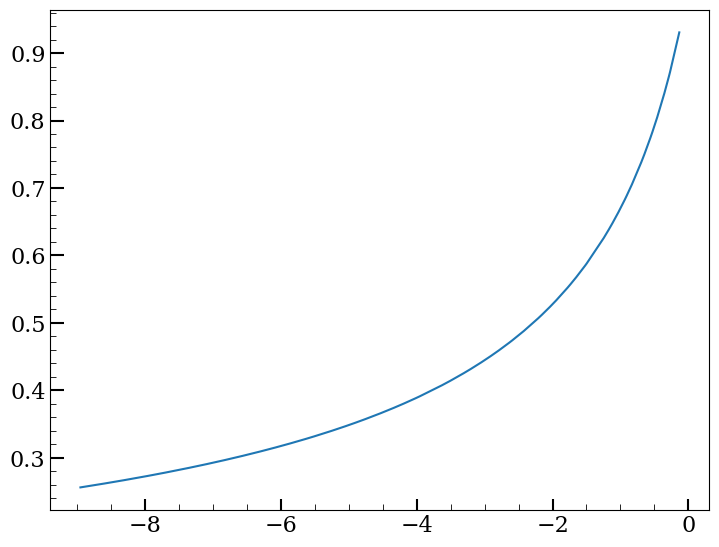

In [11]:
np.random.seed(42)
x_prime_dstrn_train = np.sort(np.random.uniform(-9.0, -0.016, 200))
x_prime_dstrn_test = np.sort(np.random.uniform(-9.0, -0.016, 200))

target_train = special.hyp2f1(2/3, 1, 7/6, x_prime_dstrn_train)
target_test = special.hyp2f1(2/3, 1, 7/6, x_prime_dstrn_test)

plt.plot(x_prime_dstrn_train, target_train)

In [12]:
# Define problem for SR optimization

hypergeom_args = {
    'allowed_symbols': "add,sub,mul,pow,aq,constant,variable",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'],
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 7200,
    'n_threads': 12,
}

Problem_hypergeom = Problem("Hypergeometric Function Problem", (x_prime_dstrn_train, target_train), (x_prime_dstrn_test, target_test), hypergeom_args)

In [ ]:
Problem_hypergeom.solve()
print(f"number of solutions: {len(Problem_hypergeom.solutions)}")

[0.06555408239364624, 5.0], 197.48, (0.686724841595 + ((-6.330864906311) * ((-0.009059339762) * X1))), 0.00
[0.003096206346526742, 7.0], 202.24, (0.126604318619 + (0.874856233597 * (((-0.019343361259) * X1) ^ ((-0.118833862245) * X1)))), 0.00
[5.8319204981671646e-05, 9.0], 202.64, ((-0.017200719565) + (1.543928265572 * ((((-1.993528246880) * X1) + 2.055473566055) ^ (-0.578992903233)))), 0.00
[4.504044045461342e-05, 11.0], 218.40, (4.914789676666 + (8.359447479248 * ((-0.586917936802) / (sqrt(1 + ((((-2.789626359940) * X1) + 2.307749032974) ^ (-0.334893852472)) ^ 2))))), 0.00
[4.095494296052493e-05, 13.0], 220.71, (4.653116226196 + ((-4.647985935211) * ((((-1.145960569382) * X1) ^ (-0.000153552275)) / (sqrt(1 + ((((-2.522436618805) * X1) + 2.036321163177) ^ (-0.335287243128)) ^ 2))))), 0.00
[1.5457369954674505e-05, 15.0], 230.88, (4.093010425568 + ((-1.601802706718) * (2.551569938660 / (sqrt(1 + ((((-2.049469232559) * X1) + (1.543123722076 / (sqrt(1 + (((-0.386021733284) * X1) / (sqrt(1

<Axes: title={'center': 'Hypergeometric Function Problem: solution 21 Train'}>

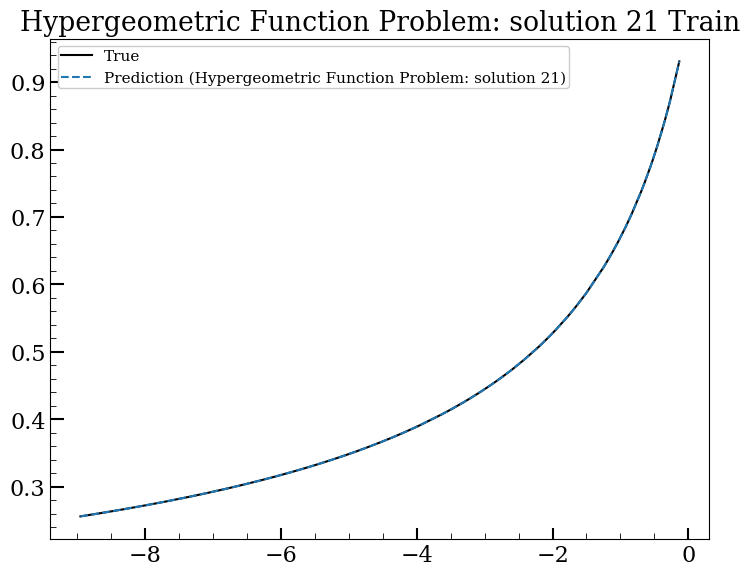

In [ ]:
Problem_hypergeom.solutions[-1].plot_results()

<Axes: xlabel='$-x$', ylabel='Fractional Error'>

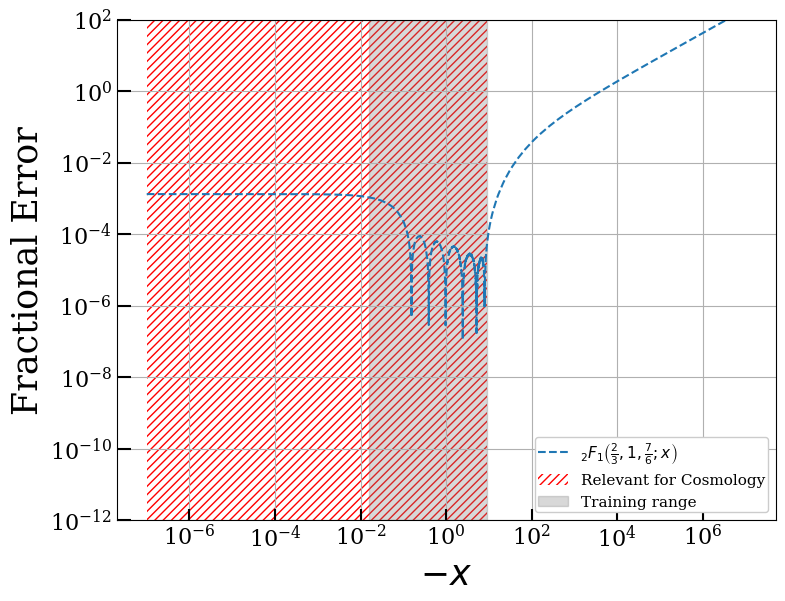

In [ ]:
x_val = -1.0 * np.geomspace(10**(-7),10**7, 10000)
Problem_hypergeom.solutions[5].plot_fractional_error_hypergeom(x_val)

<Axes: title={'center': 'Hypergeometric Function Problem - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

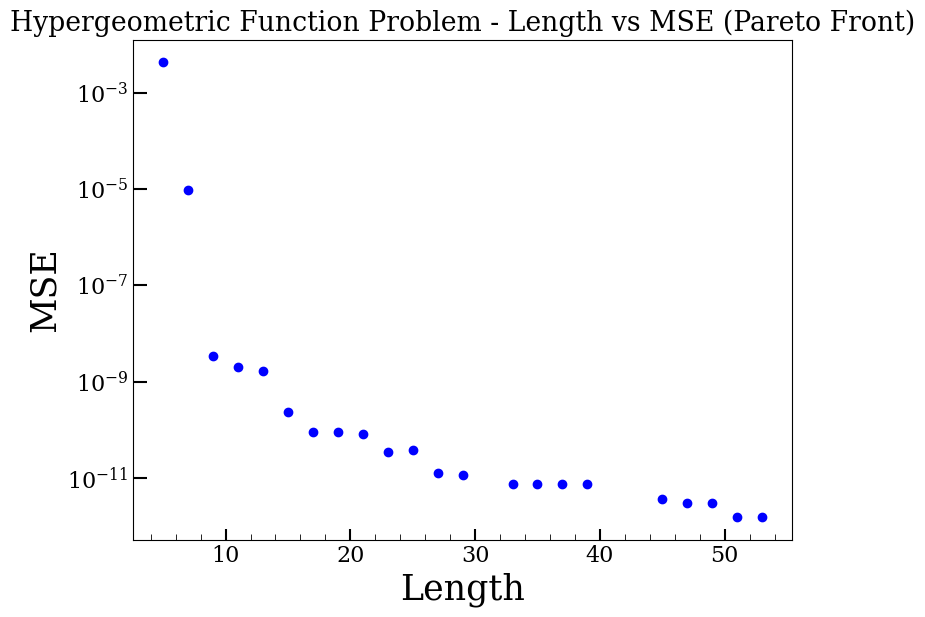

In [ ]:
Problem_hypergeom.plot_l_vs_mse()

In [ ]:
k=9
Problem_hypergeom.solutions[k].display_expression(), Problem_hypergeom.solutions[k].extract_and_format()

<IPython.core.display.Math object>

(None,
 ('b_{0} + \\frac{b_{1}}{\\sqrt{\\left(X_{1}·b_{2} + \\frac{b_{3}}{\\sqrt{\\frac{b_{4}}{b_{5}^{X_{1}·b_{6}}·\\left(- X_{1}\\right)^{X_{1}·b_{6}} + 1} + 1}·\\sqrt{\\frac{b_{7}}{b_{8}·\\left(- X_{1}\\right)^{b_{9}} + 1} + 1}}\\right)^{b_{10}} + 1}}',
  {'b0': 4.088874340057,
   'b1': -4.083320096678777,
   'b2': -2.049449682236,
   'b3': 1.542252421379,
   'b4': 0.0026811854089284952,
   'b5': 0.426239997149,
   'b6': -2.92010807991,
   'b7': 0.032759190889794114,
   'b8': 0.28297976291357485,
   'b9': -1.594854593276,
   'b10': -0.669787704944},
  b0 + b1/sqrt((X1*b2 + b3/(sqrt(b4/(b5**(X1*b6)*(-X1)**(X1*b6) + 1) + 1)*sqrt(b7/(b8*(-X1)**b9 + 1) + 1)))**b10 + 1)))

In [ ]:
Problem_hypergeom.export_solutions_to_latex(n=10)

LaTeX file written to latex_files/Hypergeometric_Function_Problemno_solutions_10/solutions.tex
